# Research Question No. 4
What is the comparative performance of learning algorithms in long-lived bug prediction in FLOSS project? This research question aims to compare the accuracy of the long-lived bug prediction made by different classification algorithms. Here the algorithm with the best prediction capabilities is best fit in terms of balanced accuracy.

# 1. Setup environment.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

# Setup Matplotlib
plt.rc('figure', figsize=(15, 15))
plt.style.use('default')
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
%matplotlib inline 

# Setup Seaborn
sns.set_context("paper")
sns.set_style("ticks")


pd.set_option('display.max_columns', None)

bug_reports_eclipse_path = "../data/20200731_eclipse_bug_report_data.csv"
bug_reports_gcc_path     = "../data/20200731_gcc_bug_report_data.csv"
print("Setup complete")

Setup complete


# 2. Load data.

# 3. First Experiment

## Experimental parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 | KNN, NB, NN, SVM, RF |
| Metrics                    | Accuracy, Kappa, ROC |
| Features                   | Short and Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Unbalance, Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 3.1 Review the data

### Best Balanced Accuracy Scores

In [4]:
eclipse_results = pd.read_csv("../output/data/20200813_r3_1a_predict_long_lived_bug_results_final.csv",  sep=",")
eclipse_best_results_by_classifier = eclipse_results.sort_values('balanced_acc', ascending=False).head()
eclipse_best_results_by_classifier = eclipse_results.groupby(["classifier"]).apply(lambda x: x.sort_values(["balanced_acc"], ascending = False)).reset_index(drop=True)
s = eclipse_best_results_by_classifier.groupby('classifier').head(1)
display(s)

,tn,fn,fp,tp,Resample,acc,sensitivity,specificity,balanced_acc,hyper1,value1,hyper2,value2,hyper3,value3,classifier,balancing,resampling,train_metric,max_term,feature,threshold,train_size,train_size_class_0,train_size_class_1,seed
0,765,0,59,1,Fold04,0.928485,1.000000,0.928398,0.964199,k,11.00000,NaN,0.0,NaN,0,knn,unbalanced,cv10,Accuracy,100,short_description,365,8252,7651,601,144
4,872,0,67,2,Fold07,0.928799,1.000000,0.928647,0.964324,fL,0.00000,usekernel,1.0,adjust,1,nb,unbalanced,cv10,Accuracy,100,long_description,365,9425,8729,696,144
8,765,0,59,1,Fold09,0.928485,1.000000,0.928398,0.964199,size,20.00000,decay,0.5,NaN,0,nn,unbalanced,cv10,Accuracy,100,short_description,365,8252,7651,601,144
12,841,32,27,808,Fold01,0.965457,0.961905,0.968894,0.965399,mtry,25.00000,NaN,0.0,NaN,0,rf,smote,cv10,Accuracy,100,long_description,365,17081,8729,8352,144
16,851,22,0,835,Fold03,0.987119,0.974329,1.000000,0.987165,sigma,0.03125,C,32.0,NaN,0,svm,smote,cv10,Accuracy,100,long_description,365,17081,8729,8352,144


In [5]:
s = s[['feature', 'classifier', 'balancing',  'train_size', 'Resample', 'balanced_acc',]]
s = s.sort_values(by=['balanced_acc'], ascending=False)
s.to_latex('/tmp/tabela_resultados_rq41.tex', index=False)
display(s)

,feature,classifier,balancing,train_size,Resample,balanced_acc
16,long_description,svm,smote,17081,Fold03,0.987165
12,long_description,rf,smote,17081,Fold01,0.965399
4,long_description,nb,unbalanced,9425,Fold07,0.964324
0,short_description,knn,unbalanced,8252,Fold04,0.964199
8,short_description,nn,unbalanced,8252,Fold09,0.964199


In [4]:
eclipse_results_by_fold = pd.read_csv("../output/data/20200813_r3_1b_predict_long_lived_bug_results_final.csv",  sep=",")

In [5]:
eclipse_results_by_fold_table = pd.pivot_table (eclipse_results_by_fold, index=['seed','Resample'], columns='classifier', values=['sensitivity', 'specificity', 'balanced_acc'])

In [6]:
eclipse_results_by_fold_table

balanced_acc                                          \
classifier             knn        nb        nn        rf       svm   
seed Resample                                                        
144  Fold01       0.463680  0.447913  0.463680  0.965399  0.985994   
     Fold02       0.463636  0.450535  0.964199  0.958365  0.984339   
     Fold03       0.463548  0.449423  0.463592  0.957196  0.987165   
     Fold04       0.964199  0.450203  0.463636  0.956607  0.979004   
     Fold05       0.463548  0.442114  0.714156  0.949891  0.983168   
     Fold06       0.462985  0.445301  0.463030  0.951956  0.977944   
     Fold07       0.463592  0.490880  0.463636  0.959060  0.984789   
     Fold08       0.463636  0.451928  0.463592  0.955440  0.975134   
     Fold09       0.463548  0.452496  0.463592  0.951369  0.976270   
     Fold10       0.463548  0.467537  0.463636  0.950770  0.983730   
283  Fold01       0.463548  0.467829  0.463636  0.953737  0.976543   
     Fold02       0.463636  0.447967  0.463636  0.948417  0.985962   
     Fold03       0.463636  0.446876  0.463680  0.953698  0.982606   
     Fold04       0.463459  0.450508  0.463636  0.956824  0.987734   
     Fold05       0.463075  0.480873  0.463030  0.951392  0.975200   
     Fold06       0.463592  0.494901  0.463592  0.951412  0.984859   
     Fold07       0.463636  0.443309  0.463636  0.957996  0.986030   
     Fold08       0.463592  0.451391  0.463548  0.963634  0.984255   
     Fold09       0.463504  0.472290  0.463548  0.950234  0.989428   
     Fold10       0.964199  0.447705  0.964199  0.949622  0.980237   
1087 Fold01       0.463592  0.452427  0.463636  0.955474  0.986009   
     Fold02       0.714199  0.442740  0.463592  0.951371  0.979145   
     Fold03       0.463504  0.447066  0.463636  0.951924  0.980374   
     Fold04       0.463548  0.449505  0.630779  0.961450  0.986009   
     Fold05       0.964199  0.451646  0.463592  0.947841  0.980374   
     Fold06       0.547314  0.472784  0.463636  0.964228  0.989428   
     Fold07       0.463548  0.453447  0.463504  0.952515  0.985962   
     Fold08       0.588504  0.442884  0.963636  0.960743  0.981997   
     Fold09       0.463636  0.446915  0.463592  0.960743  0.987664   
     Fold10       0.463636  0.483467  0.463636  0.943937  0.979143   
2293 Fold01       0.463636  0.455802  0.463636  0.960699  0.984339   
     Fold02       0.463548  0.445363  0.463636  0.950792  0.982679   
     Fold03       0.463636  0.453246  0.463592  0.961468  0.981997   
     Fold04       0.589068  0.443990  0.964199  0.960148  0.987061   
     Fold05       0.463592  0.444657  0.564024  0.952508  0.980875   
     Fold06       0.463636  0.463847  0.463636  0.953747  0.982606   
     Fold07       0.463592  0.452630  0.463636  0.955449  0.981997   
     Fold08       0.463636  0.443710  0.463636  0.953124  0.984919   
     Fold09       0.963636  0.474049  0.463030  0.957200  0.983123   
     Fold10       0.463548  0.453827  0.463548  0.950777  0.985363   
3581 Fold01       0.631258  0.447051  0.463592  0.953101  0.988304   
     Fold02       0.463636  0.436421  0.463592  0.956239  0.982016   
     Fold03       0.463636  0.453008  0.463636  0.951996  0.986524   
     Fold04       0.463680  0.495319  0.463636  0.961292  0.984255   
     Fold05       0.463592  0.444860  0.463548  0.959026  0.984189   
     Fold06       0.463548  0.446675  0.463636  0.950184  0.977613   
     Fold07       0.714156  0.450698  0.463548  0.961937  0.981546   
     Fold08       0.463030  0.453033  0.463075  0.954876  0.984255   
     Fold09       0.630779  0.464049  0.463592  0.957805  0.981488   
     Fold10       0.964199  0.453231  0.714156  0.952512  0.982517   

              sensitivity                                         specificity  \
classifier            knn        nb        nn        rf       svm         knn   
seed Resample                                                                   
144  Fold01      0.000000  0.040614  0.000000  0.961905  0.9

In [7]:
classifiers = ['knn', 'nb', 'nn', 'rf', 'svm']
statistics  = pd.DataFrame(columns=['classifier1', 'mean1', 'classifier2', 'mean2', 'condition', 'direction'])

for classifier1 in classifiers:
    sample1 = eclipse_results_by_fold_table.loc[:, (slice('balanced_acc'), classifier1)].values 
    mean1   = np.mean(sample1)
    for classifier2 in classifiers:
        sample2 = eclipse_results_by_fold_table.loc[:, (slice('balanced_acc'), classifier2)].values
        mean2   = np.mean(sample2)
        condition = True
        p  = 1.0
        if (classifier1 != classifier2):
            stat, p = wilcoxon(sample1.flatten(), sample2.flatten())
            print('Statistics=%.3f, p=%.3f mean1=%.3f mean2=%.3f'  % (stat, p, mean1, mean2))
    
            alpha = 0.05
            condition = p > alpha
            if condition:
                print(f"{classifier1} has a same distributions of {classifier2} (fail to reject H0)")
            else:
                print(f"{classifier1} has a different distribution of {classifier2} (reject H0)")
            
        statistics = statistics.append(
            {'classifier1': classifier1, 
             'mean1': mean1, 
             'classifier2': classifier2,
             'mean2': mean2,
             'condition': condition,
             'direction': '$-$' if condition else '$\\leftarrow$' if mean1 > mean2 else '$\\uparrow$'}
            , ignore_index=True
        )
    

Statistics=180.000, p=0.000 mean1=0.537 mean2=0.455
knn has a different distribution of nb (reject H0)
Statistics=367.500, p=0.753 mean1=0.537 mean2=0.519
knn has a same distributions of nn (fail to reject H0)
Statistics=15.000, p=0.000 mean1=0.537 mean2=0.955
knn has a different distribution of rf (reject H0)
Statistics=0.000, p=0.000 mean1=0.537 mean2=0.983
knn has a different distribution of svm (reject H0)
Statistics=180.000, p=0.000 mean1=0.455 mean2=0.537
nb has a different distribution of knn (reject H0)
Statistics=227.000, p=0.000 mean1=0.455 mean2=0.519
nb has a different distribution of nn (reject H0)
Statistics=0.000, p=0.000 mean1=0.455 mean2=0.955
nb has a different distribution of rf (reject H0)
Statistics=0.000, p=0.000 mean1=0.455 mean2=0.983
nb has a different distribution of svm (reject H0)
Statistics=367.500, p=0.753 mean1=0.519 mean2=0.537
nn has a same distributions of knn (fail to reject H0)
Statistics=227.000, p=0.000 mean1=0.519 mean2=0.455
nn has a different di

In [12]:
s = statistics[['classifier1', 'classifier2', 'direction']]
s = s.pivot(index='classifier1', columns='classifier2', values='direction')
s.to_latex('/tmp/tabela_teste_estatistico.tex', index=True)
s

classifier2,knn,nb,nn,rf,svm
classifier1,,,,,
knn,$-$,$\leftarrow$,$-$,$\uparrow$,$\uparrow$
nb,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\uparrow$
nn,$-$,$\leftarrow$,$-$,$\uparrow$,$\uparrow$
rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\uparrow$
svm,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$


In [11]:
statistics_pivoted=pd.pivot_table(statistics, index=['classifier1'], columns=['classifier2'], values=['mean1', 'mean2'])
statistics_pivoted

mean1                                             mean2  \
classifier2       knn        nb        nn        rf       svm       knn   
classifier1                                                               
knn          0.537011  0.537011  0.537011  0.537011  0.537011  0.537011   
nb           0.455406  0.455406  0.455406  0.455406  0.455406  0.537011   
nn           0.518974  0.518974  0.518974  0.518974  0.518974  0.537011   
rf           0.955162  0.955162  0.955162  0.955162  0.955162  0.537011   
svm          0.983083  0.983083  0.983083  0.983083  0.983083  0.537011   

                                                     
classifier2        nb        nn        rf       svm  
classifier1                                          
knn          0.455406  0.518974  0.955162  0.983083  
nb           0.455406  0.518974  0.955162  0.983083  
nn           0.455406  0.518974  0.955162  0.983083  
rf           0.455406  0.518974  0.955162  0.983083  
svm          0.455406  0.518974  0.955162  0.983083

### Best Sensitivity Scores

# 4. Second Experiment (RQ4.2)

## 4.1 Parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100, 150, 200, 250, 300       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 4.2 Review Data

In [25]:
e2_metrics_data.sort_values('balanced_acc', ascending=False).head()

,project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fp,tn,fn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
0,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,71,656,1565,116,0.379679,0.704638,0.542158,0.542158,0.097662,0.379679,0.155361
1,eclipse,long_description,150,nn,smote,repeatedcv,Accuracy,365,12926,6700,6226,2421,2233,188,63,568,1665,125,0.335106,0.745634,0.540370,0.540370,0.099842,0.335106,0.153846
4,eclipse,long_description,300,nn,smote,repeatedcv,Accuracy,365,12966,6729,6237,2432,2243,189,45,411,1832,144,0.238095,0.816763,0.527429,0.527429,0.098684,0.238095,0.139535
2,eclipse,long_description,200,nn,smote,repeatedcv,Accuracy,365,12954,6717,6237,2426,2238,188,49,475,1763,139,0.260638,0.787757,0.524198,0.524198,0.093511,0.260638,0.137640
3,eclipse,long_description,250,nn,smote,repeatedcv,Accuracy,365,12963,6726,6237,2429,2241,188,44,439,1802,144,0.234043,0.804105,0.519074,0.519074,0.091097,0.234043,0.131148


## 4.3 Evaluation Metrics

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


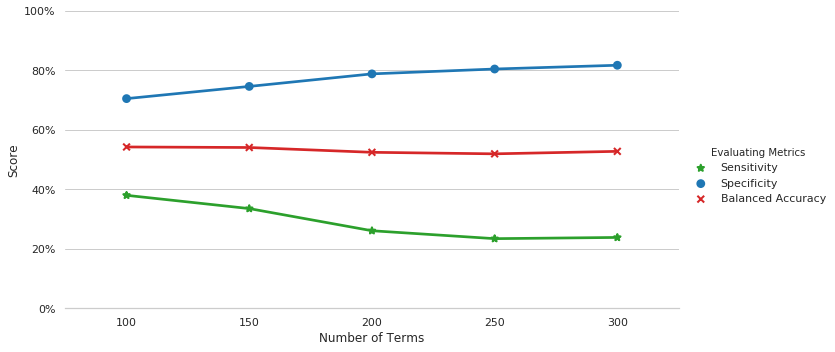

In [26]:
from  matplotlib.ticker import PercentFormatter
sns.set_context("paper")
sns.set(style="whitegrid", font_scale=1.0)
e2_metrics_data_melted = e2_metrics_data[['n_term', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['n_term']) 

g = sns.catplot(data=e2_metrics_data_melted
                , kind="point"
                , x="n_term"
                , y="value"
                , hue="variable"
                , saturation=.0
                , height=6
                , size=5
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"]
                , markers=["*", "o", "x"]
                #, linestyles=["-", "--", "dotted"]
                , legend_out=True)

(g.set_axis_labels("Number of Terms", "Score")
  .set_titles(" Balanced Accuracy: Neural Network")
  .set(ylim=(0, 1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
g.savefig(f"figures/rq4e2-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [27]:
from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker

def plot_line(x_ticks, x_label, experiment, data, id_var):
    sns.set_context("paper")
    sns.set(style="ticks", color_codes=True)
    e2_metrics_data_melted = data[[id_var, 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=[id_var]) 

    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='sensitivity'], label="Sensitivity", marker='*', markerfacecolor='tab:green', markersize=8, color='tab:green', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='specificity'], label="Specificity", marker='o', markerfacecolor='tab:blue',  markersize=8, color='tab:blue', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='balanced_acc'], label="Balanced Accuracy", marker='x',markerfacecolor='tab:red',   markersize=8, color='tab:red', linewidth=2)
    sns.despine(offset=5)

    ax = plt.axes()
    
    plt.xticks(x_ticks)
    plt.xlabel(x_label, fontsize=SMALL_SIZE)
    
    plt.yticks(fontsize=SMALL_SIZE)
    plt.ylabel('Score', fontsize=SMALL_SIZE)
    plt.ylim(0, 1)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

    plt.title("Eclipse: Evaluation Metrics", fontsize=SMALL_SIZE)
    plt.legend()
    plt.savefig(f"figures/rq4e{experiment}-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


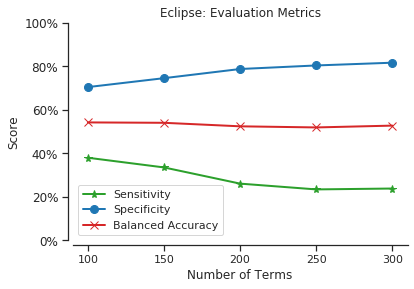

In [28]:
plot_line([100, 150, 200, 250, 300], "Number of Terms", "2", e2_metrics_data, "n_term")

## 4.4 Test Results

In [29]:
e2_tests_data = pd.read_csv(e2_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e2_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e2_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,long_lived,y_hat
48,JSDT-212668,2007-12-11,General,JSDT,[hotbug] JavaScript validation error on JSPs,This is a follow-on to bug 207589:\n\nI just t...,nitind,kathy,fixed,1,resolved,4,2010-03-03,2,14,2009-02-12,429,normal,2,Y,Y
86,ASPECTJ-166347,2006-11-30,Docs,ASPECTJ,AspectJ website points to wrong version of ajd...,The AspectJ documentation http://www.eclipse.o...,aspectj-inbox,hlhawkins,fixed,1,resolved,4,2008-08-21,0,2,2008-08-21,630,normal,2,Y,Y
127,PLATFORM-56094,2004-03-25,SWT,PLATFORM,tracker resize uses screen coordinates instead...,No matter what you use in tracker's first argu...,grant_gayed,stromgt,fixed,1,resolved,4,2005-04-13,0,3,2005-04-13,384,normal,2,Y,Y
187,PLATFORM-213305,2007-12-18,SWT,PLATFORM,100% cpu usage on opening files with long lines.,Created attachment 85458\nA java source file f...,eclipse.felipe,mascha,fixed,1,resolved,4,2014-02-25,2,24,2009-02-04,414,normal,2,Y,Y
203,PLATFORM-31385,2003-02-07,SWT,PLATFORM,Redraw problems: selecting text backwards,eclipse 2.1I200302061700 linux-gtk j2sdk-1.4.1...,eclipse.felipe,nickell,fixed,1,resolved,4,2004-06-28,0,23,2004-06-28,507,normal,2,Y,Y


# 5. Third Experiment (RQ4.3)

## 5.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        1, 8, 63, 365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 5.2 Review Data

In [30]:
e3_metrics_data.sort_values('balanced_acc', ascending=False).head()

,project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fp,tn,fn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
0,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,1,9401,4348,5053,2408,724,1684,1183,439,285,501,0.702494,0.393646,0.548070,0.548070,0.729346,0.702494,0.715668
3,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,71,656,1565,116,0.379679,0.704638,0.542158,0.542158,0.097662,0.379679,0.155361
1,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,8,7227,3612,3615,2408,1203,1205,658,594,609,547,0.546058,0.506234,0.526146,0.526146,0.525559,0.546058,0.535613
2,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,63,9039,5415,3624,2408,1805,603,103,269,1536,500,0.170813,0.850970,0.510891,0.510891,0.276882,0.170813,0.211282


## 5.3 Evaluation Metrics

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


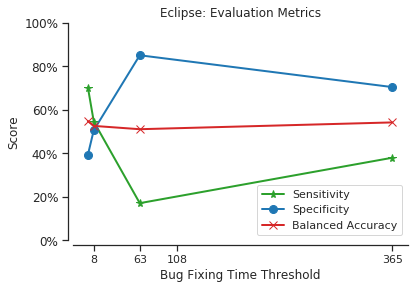

In [31]:
plot_line([8, 63, 108, 365], "Bug Fixing Time Threshold", "3", e3_metrics_data, "threshold")

## 5.4 Tests Results

In [32]:
e3_tests_data = pd.read_csv(e3_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e3_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e3_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

FileNotFoundError: [Errno 2] File b'datasets/20190925200836_rq4e3_eclipse_test_results_balanced_acc.csv' does not exist: b'datasets/20190925200836_rq4e3_eclipse_test_results_balanced_acc.csv'

# 6. Fourth Experiment

## 6.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse, Freedesktop, Gcc, Gnome, Mozilla, WineHQ       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**.

## 6.2 Review Data

In [ ]:
e4_metrics_data.sort_values('balanced_acc', ascending=False).head(6)

## 6.3 Evaluation Metrics

<Figure size 640x480 with 0 Axes>

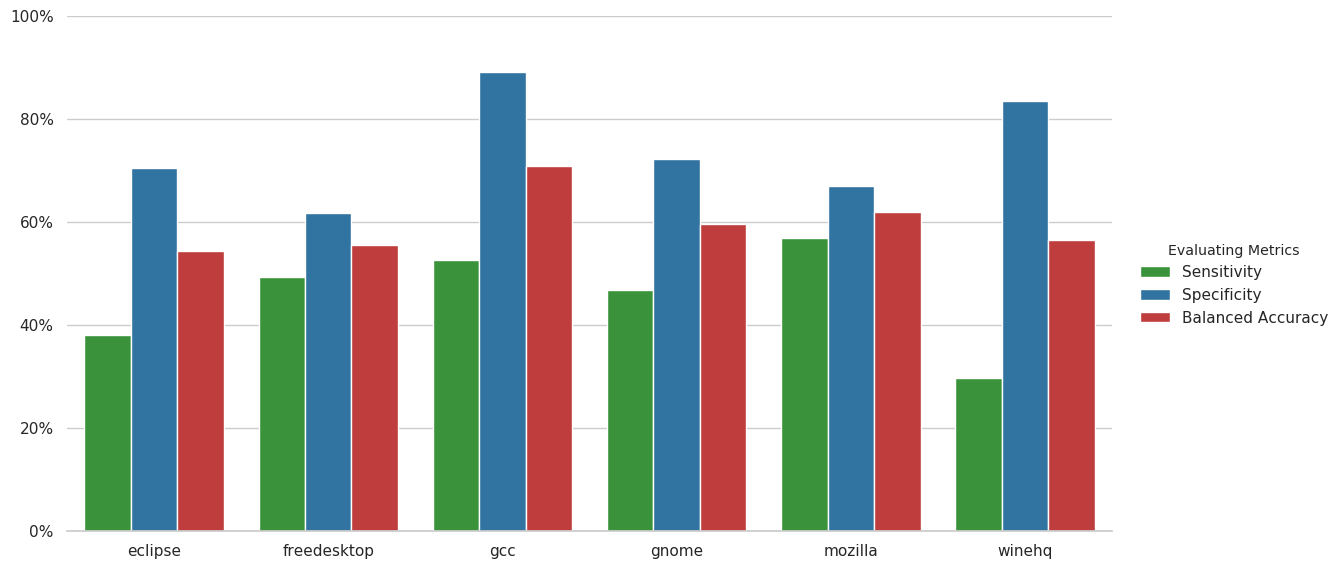

<Figure size 640x480 with 0 Axes>

In [39]:
sns.despine(offset=5)
sns.set(style="whitegrid")
e4_metrics_data_melted = e4_metrics_data[['project', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['project']) 
g = sns.catplot(data=e4_metrics_data_melted
                , kind="bar"
                , x="project"
                , y="value"
                , hue="variable"
                #, saturation=.5
                , height=6
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"])
(g.set_axis_labels("", "")
  .set_titles(" GCC: Neural Network Performance")
  .set(ylim=(0,1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
plt.savefig("figures/r4e4_performace_algorithms_on_eclipse_dataset.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [34]:
from pandas import DataFrame

metrics = {'dataset': ['Eclipse', 'Freedesktop', 'Gnome', 'Mozilla', 'Gcc', 'WineHQ'],
        '% of Long-Lived Bugs': [7.7, 13.6, 14.4, 18.1, 29.2, 40.7],
        'Balanced Accuracy (%)': [54.21, 55.44, 59.48, 61.84, 70.77, 56.46]}

df = DataFrame(metrics)

print (df) 

       dataset  % of Long-Lived Bugs  Balanced Accuracy (%)
0      Eclipse                   7.7                  54.21
1  Freedesktop                  13.6                  55.44
2        Gnome                  14.4                  59.48
3      Mozilla                  18.1                  61.84
4          Gcc                  29.2                  70.77
5       WineHQ                  40.7                  56.46


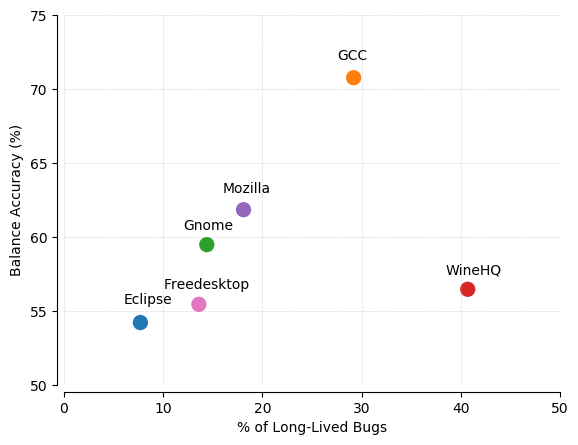

In [35]:
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')

x=df['% of Long-Lived Bugs']
y=df['Balanced Accuracy (%)']

plt.scatter(x, y, s=100, color=['tab:blue', 'tab:pink', 'tab:green', 'tab:purple', 'tab:orange', 'tab:red'])
plt.xlim(0,50)
plt.ylim(50, 75)
plt.text(6, 55.5, 'Eclipse')
plt.text(10, 56.5, 'Freedesktop')
plt.text(12, 60.5, 'Gnome')
plt.text(16, 63.0, 'Mozilla')
plt.text(27.5, 72, 'GCC')
plt.text(38.5, 57.5, 'WineHQ')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('% of Long-Lived Bugs')
plt.ylabel('Balance Accuracy (%)')

sns.despine(offset=5, trim=True)


## 6.4 Tests Results

In [36]:
e4_tests_data = pd.read_csv(e4_tests_path)
bug_reports_data = pd.read_csv(bug_reports_gcc_path)
test_e4_merged_data = pd.merge(
    bug_reports_data,
    e4_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e4_merged_data.query('long_lived == "Y" and y_hat == "N"')
#correct_predicted_bugs.head()
correct_predicted_bugs.groupby('long_lived')['long_lived'].agg(['count'])

FileNotFoundError: [Errno 2] File b'datasets/rq4e4_gcc_tests_balanced_acc.csv' does not exist: b'datasets/rq4e4_gcc_tests_balanced_acc.csv'